# **BigMart Sales Prediction using Random Forest Regressor**

-------------

## **Objective**

 To develop a predictive model using Random Forest Regressor for Big Mart sales, with the goal of accurately forecasting sales for individual products across different stores.

## **Data Source**

1) Historical Sales Data
2) Store Information
3) Item Information
4) Time-Related Data

## **Import Library**

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

## **Import Data**

In [2]:
big_sales = pd.read_csv('Big Sales Data.csv')

## **Describe Data**

In [3]:
big_sales.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [4]:
big_sales.shape

(14204, 12)

In [5]:
big_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [6]:
big_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


In [7]:
big_sales['Item_Weight'] =  big_sales['Item_Weight'].fillna(big_sales['Item_Weight'].mean())

In [8]:
big_sales.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## **Data Visualization**

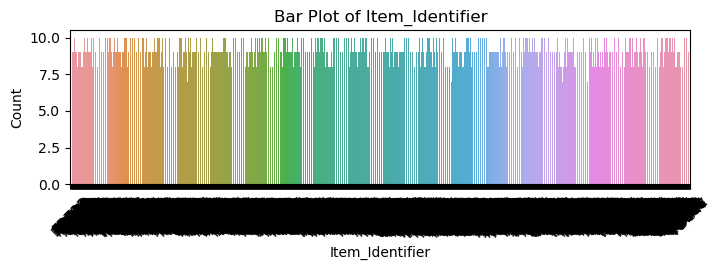

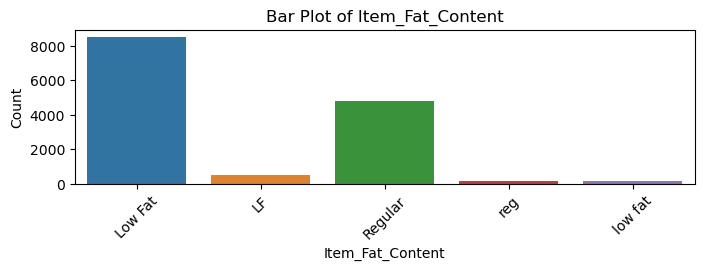

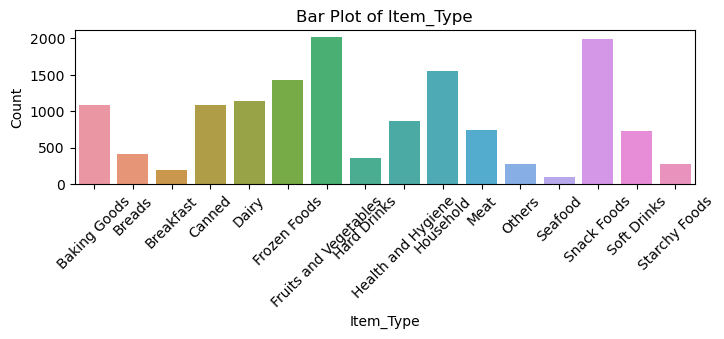

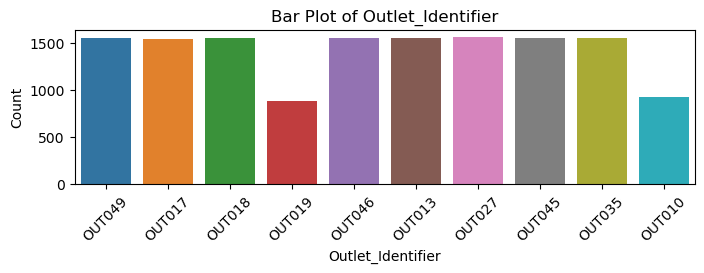

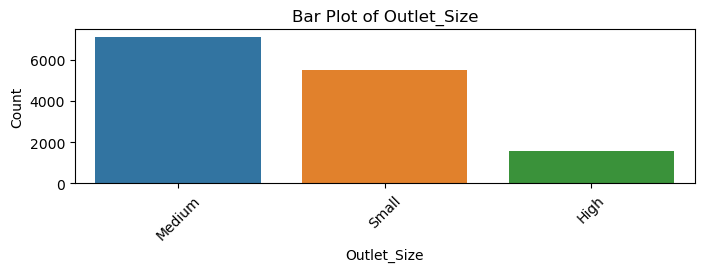

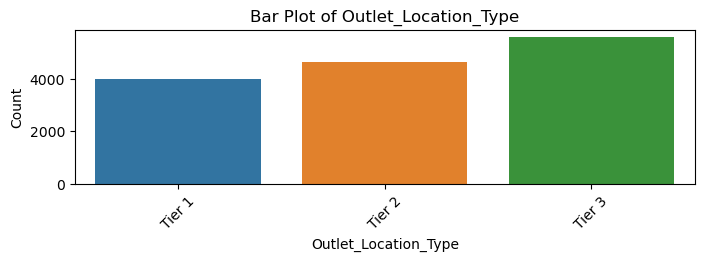

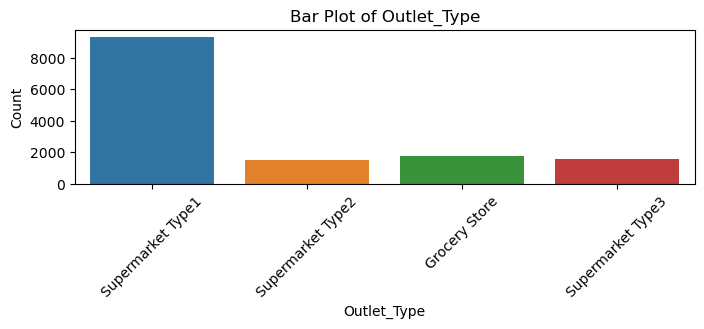

In [9]:
categorical_columns = big_sales.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 2))
    sns.countplot(data=big_sales, x=col)
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

C:\Users\mural\AppData\Local\Temp\ipykernel_9080\2344164055.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = big_sales.corr()


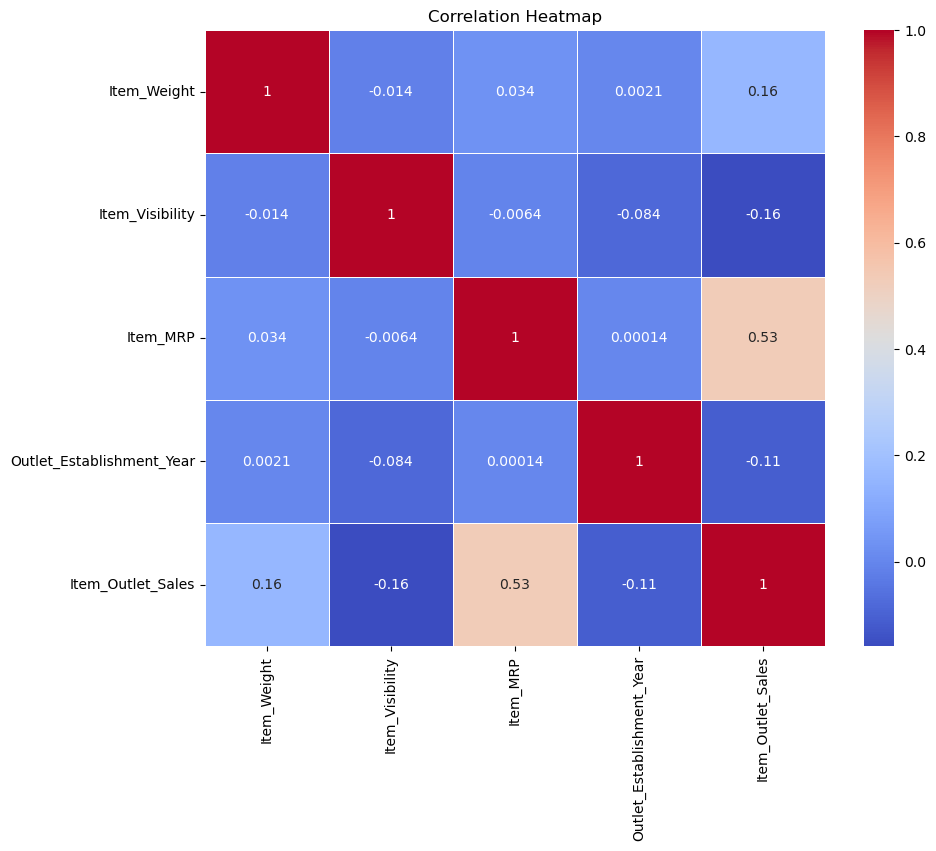

In [10]:
#heatmap visualization

correlation_matrix = big_sales.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## **Data Preprocessing**

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
for col in big_sales.columns:
    if big_sales[col].dtype == 'object':
        lbl=LabelEncoder()
        lbl.fit(list(big_sales[col].values))
        big_sales[col]=lbl.transform(big_sales[col].values)

In [13]:
big_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,946,12.3,1,0.111448,0,33.4874,9,1999,1,0,1,436.608721
1,946,12.3,1,0.111904,0,33.9874,2,2007,1,1,1,443.127721
2,946,12.3,0,0.111728,0,33.9874,3,2009,1,2,2,564.598400
3,946,12.3,1,0.000000,0,34.3874,4,1985,2,0,0,1719.370000
4,740,9.8,2,0.045523,0,35.0874,2,2007,1,1,1,352.874000


## **Define Target Variable (y) and Feature Variables (X)**

In [18]:
X = big_sales.drop(['Outlet_Establishment_Year','Item_Identifier','Item_Outlet_Sales'],axis=1)
y = big_sales['Item_Outlet_Sales']

In [19]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,12.300000,1,0.111448,0,33.4874,9,1,0,1
1,12.300000,1,0.111904,0,33.9874,2,1,1,1
2,12.300000,0,0.111728,0,33.9874,3,1,2,2
3,12.300000,1,0.000000,0,34.3874,4,2,0,0
4,9.800000,2,0.045523,0,35.0874,2,1,1,1
...,...,...,...,...,...,...,...,...,...
14199,12.800000,1,0.069606,15,261.9252,6,2,1,1
14200,12.800000,1,0.070013,15,262.8252,2,1,1,1
14201,12.800000,1,0.069561,15,263.0252,1,0,2,1
14202,12.788355,1,0.069282,15,263.5252,5,1,2,3


In [20]:
y

0         436.608721
1         443.127721
2         564.598400
3        1719.370000
4         352.874000
            ...     
14199    4984.178800
14200    2885.577200
14201    2885.577200
14202    3803.676434
14203    3644.354765
Name: Item_Outlet_Sales, Length: 14204, dtype: float64

## **Train Test Split**

In [22]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=.20, random_state=0)

In [24]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## **Modeling**

In [28]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

## **Model Evaluation**

In [30]:
y_pred = rf_regressor.predict(x_test)

In [31]:
y_pred

array([1597.19354173, 3846.18400886,  899.90633569, ..., 3924.43251768,
        985.60964706, 2432.24862216])

## **Prediction**

In [33]:
r2 = r2_score(y_test, y_pred)

print(f"R-squared (R2) Score: {r2}")

R-squared (R2) Score: 0.48540010727156635


In [35]:
# Ploting result

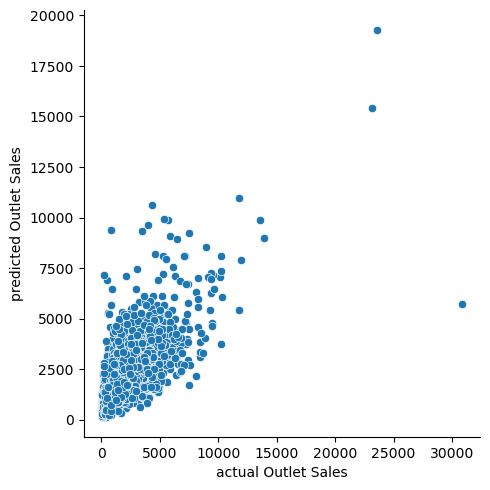

In [34]:
prediction= pd.DataFrame({'actual Outlet Sales': y_test, 'predicted Outlet Sales': y_pred})
sns.relplot(data=prediction, x='actual Outlet Sales', y='predicted Outlet Sales')

## **Explaination**

The result 0.4854, is the outcome of a regression analysis using the Random Forest algorithm to predict sales at BigMart. In regression analysis, the goal is to predict a continuous numeric value (in this case, sales) based on various input features or variables.